In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from main.utils import load_experiment, load_experiments

%reload_ext autoreload
%autoreload 2

In [34]:
plt.style.use('seaborn-v0_8-paper')
plt.style.use('seaborn-v0_8')

## Redundant MNIST

In [35]:
# load entropy results from pickle file
random_ids = ['10x_redundant_random_' + str(i) for i in range(1, 6)]
bald_ids = ['5x_redundant_bald_' + str(i) for i in range(1, 6)]
logdet_ids = ['10x_redundant_logdet_' + str(i) for i in range(1, 6)]
logdet_softlabel_ids = ['mnist_logdet_samplelabel_' + str(i) for i in range(1, 6)]
logdet_hardlabel_ids = ['mnist_logdet_hardlabel_' + str(i) for i in range(1, 6)]

batch_sizes = [40 + i * 5 for i in range(13)]

id_list = [logdet_hardlabel_ids, logdet_softlabel_ids]

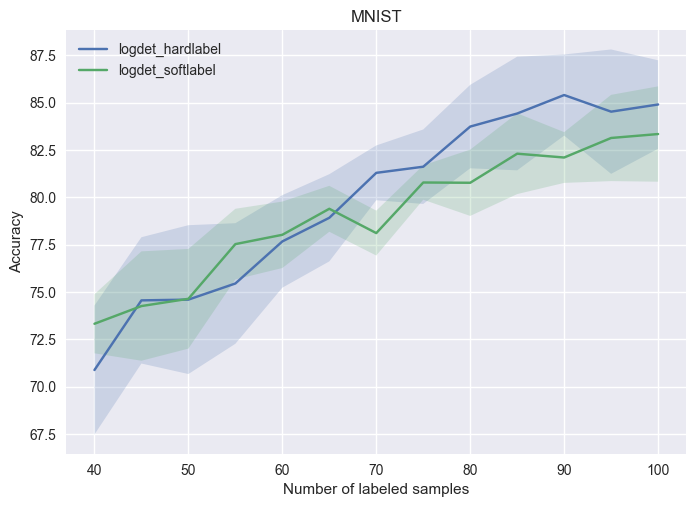

In [36]:
for method in id_list:
    results = load_experiments(method)
    accuracies = np.array([result[1]['test_accs'] for result in results])
    std = np.std(accuracies, axis=0)
    mean = np.mean(accuracies, axis=0)
    plt.plot(batch_sizes, mean, label=results[0][0].al_method)
    plt.fill_between(batch_sizes, mean - std, mean + std, alpha=0.2, label='_nolegend_')

    plt.legend()
    plt.xlabel('Number of labeled samples')
    plt.ylabel('Accuracy')
    plt.title('MNIST')

# set labels manually
plt.legend(['logdet_hardlabel', 'logdet_softlabel'])
plt.show()